In [92]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [93]:
DATASET_PATH = 'C:/Temp/files/GeekBrains/ds_python_libs/final/train.csv'
TEST_PATH = 'C:/Temp/files/GeekBrains/ds_python_libs/final/test.csv'

**File descriptions**

* train.csv - the training set
* test.csv - the test set
* sampleSubmission.csv - a sample submission file in the correct format

**Data fields**
* Id - идентификационный номер квартиры
* DistrictId - идентификационный номер района
* Rooms - количество комнат
* Square - площадь
* LifeSquare - жилая площадь
* KitchenSquare - площадь кухни
* Floor - этаж
* HouseFloor - количество этажей в доме
* HouseYear - год постройки дома
* Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
* Social_1, Social_2, Social_3 - социальные показатели местности
* Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
* Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
* Price - цена квартиры

## Read data

In [94]:
df = pd.read_csv(DATASET_PATH)
df.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [95]:
X_test = pd.read_csv(TEST_PATH)
y_test = pd.DataFrame()
y_test['Id'] = X_test['Id'].copy()
X_test.set_index('Id', inplace = True)

In [96]:
y = pd.DataFrame(df['Price'], columns = ['Price'])
X = df.drop('Price', axis = 1)
X.set_index('Id', inplace = True)

In [97]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
dtypes: 

In [98]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     3959 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   2623 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   object 
dtypes: fl

In [99]:
tech_square = np.around((X['Square'] - X['LifeSquare'] - X['KitchenSquare']), decimals = 0).mode()[0]
tech_square

11.0

In [100]:
print(f"LifeSquare X_test Nan: {X_test['LifeSquare'].isna().sum()/len(X_test['LifeSquare'])}")
print(f"LifeSquare X Nan: {X['LifeSquare'].isna().sum()/len(X['LifeSquare'])}")

LifeSquare X_test Nan: 0.2082
LifeSquare X Nan: 0.2113


In [101]:
print(f"LifeSquare X_test bad values: {sum(X_test['LifeSquare'].isna() | (X_test['Square'] < X_test['LifeSquare'] + X_test['KitchenSquare'] + tech_square))/len(X_test['LifeSquare'])}")
print(f"LifeSquare X bad values: {sum(X['LifeSquare'].isna() | (X['Square'] < X['LifeSquare'] + X['KitchenSquare'] + tech_square))/len(X['LifeSquare'])}")

LifeSquare X_test bad values: 0.5824
LifeSquare X bad values: 0.585


In [102]:
#LifeSquare may be removed

In [103]:
print(f"Healthcare_1 X_test Nan: {X_test['Healthcare_1'].isna().sum()/len(X_test['Healthcare_1'])}")
print(f"Healthcare_1 X Nan: {X['Healthcare_1'].isna().sum()/len(X['Healthcare_1'])}")

Healthcare_1 X_test Nan: 0.4754
Healthcare_1 X Nan: 0.4798


In [104]:
#Healthcare_1 will be removed

In [105]:
X.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000


## EDA

#### price

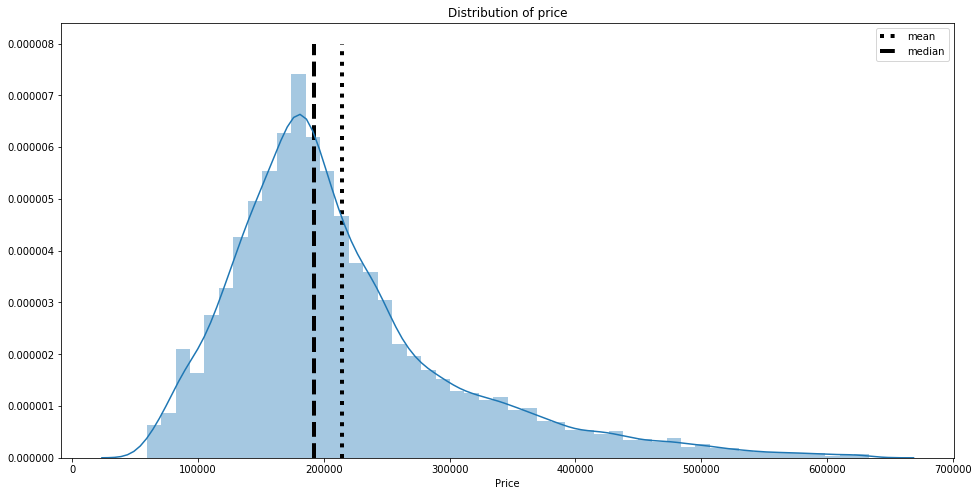

In [106]:
fig, ax = plt.subplots(figsize = (16, 8))
sns.distplot(y['Price'])
ax.vlines(y['Price'].mean(), 0, 0.000008, label='mean', linestyle=':', linewidth=4)
ax.vlines(y['Price'].median(), 0, 0.000008, label='median', linestyle='--', linewidth=4)

plt.title('Distribution of price')
plt.legend()
plt.show()

#### outs

In [107]:
quant_features = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2',
       'Shops_1']
bin_features = ['Ecology_2', 'Ecology_3', 'Shops_2']

In [108]:
pure_metrics = X.loc[:, quant_features].describe().loc[['mean', 'std']]
pure_metrics.T

,mean,std
Rooms,1.890500,0.839512
Square,56.315775,21.058732
LifeSquare,37.199645,86.241209
KitchenSquare,6.273300,28.560917
Floor,8.526700,5.241148
HouseFloor,12.609400,6.775974
HouseYear,3990.166300,200500.261427
Ecology_1,0.118858,0.119025
Social_1,24.687000,17.532614
Social_2,5352.157400,4006.799803


In [109]:
def outs(feature):
    bot = X.loc[:, quant_features].boxplot(column = [feature], return_type = 'dict')['caps'][0].get_ydata()[0]
    top = X.loc[:, quant_features].boxplot(column = [feature], return_type = 'dict')['caps'][1].get_ydata()[0]
    med = X.loc[:, quant_features].boxplot(column = [feature], return_type = 'dict')['medians'][0].get_ydata()[1]
    part = len(X.loc[:, quant_features][feature][(X.loc[:, quant_features][feature] > top) | (X.loc[:, quant_features][feature] < bot)])/len(X.loc[:, quant_features][feature])
    return {'bot': bot, 'med': med, 'top': top, 'part': part}


,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1
bot,0.0000,13.784865,0.370619,0.0000,1.0000,0.0000,1934.0000,0.000000,0.0,168.0000,0.0000,0.0000,0.0000
med,2.0000,52.513310,32.781260,6.0000,7.0000,13.0000,1977.0000,0.075424,25.0,5285.0000,2.0000,1.0000,3.0000
top,3.0000,102.056968,78.651539,21.0000,24.0000,29.0000,2020.0000,0.460556,74.0,14892.0000,11.0000,5.0000,11.0000
part,0.0172,0.024200,0.024000,0.0047,0.0066,0.0049,0.0038,0.006100,0.0,0.0176,0.0862,0.0099,0.0553


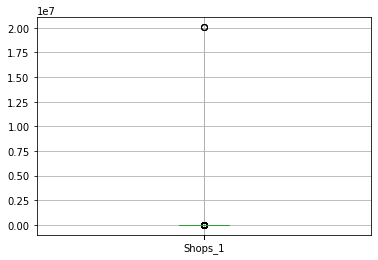

In [110]:
feature_out = pd.DataFrame({col: outs(col) for col in X.loc[:, quant_features].columns})
feature_out

#### ToDo
* выбросы меняем на медиану. 
* если floor > house floor, то заменяем floor на house floor
* удаляем Healthcare_1
* nan LifeSquare = Square - KitchenSquare - tech_square
* eсли общая площадь меньше суммы жилой и кухни, то LifeSquare = Square - KitchenSquare

### 1. Clear outs

In [112]:
X.loc[X['Square'] < X['LifeSquare'] + X['KitchenSquare'], 'LifeSquare'] = np.nan
X_test.loc[X_test['Square'] < X_test['LifeSquare'] + X_test['KitchenSquare'], 'LifeSquare'] = np.nan

In [113]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=100)

In [114]:
def fill_nan(X):
    imp_arr = pd.DataFrame(imputer.fit_transform(X.loc[:, quant_features]), index = X.index.copy())
    imp_arr.columns = X.loc[:, quant_features].columns
    X = pd.concat([imp_arr, X.loc[:, bin_features]], axis = 1)
    return X

In [115]:
X = fill_nan(X)
X_test = fill_nan(X_test)

In [117]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          5000 non-null   float64
 1   Square         5000 non-null   float64
 2   LifeSquare     5000 non-null   float64
 3   KitchenSquare  5000 non-null   float64
 4   Floor          5000 non-null   float64
 5   HouseFloor     5000 non-null   float64
 6   HouseYear      5000 non-null   float64
 7   Ecology_1      5000 non-null   float64
 8   Social_1       5000 non-null   float64
 9   Social_2       5000 non-null   float64
 10  Social_3       5000 non-null   float64
 11  Helthcare_2    5000 non-null   float64
 12  Shops_1        5000 non-null   float64
 13  Ecology_2      5000 non-null   object 
 14  Ecology_3      5000 non-null   object 
 15  Shops_2        5000 non-null   object 
dtypes: float64(13), object(3)
memory usage: 664.1+ KB


In [118]:
# X.loc[X['Square'] < X['LifeSquare'] + X['KitchenSquare'], 'LifeSquare']

In [119]:
def clear_outs(X):
    for col in X.loc[:, quant_features].columns:
        X.loc[(X[col] > feature_out[col]['top']) | (X[col] < feature_out[col]['bot']), col] = feature_out[col]['med']

    X.loc[X['Floor'] > X['HouseFloor'], 'Floor'] = X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor']
    if 'Healthcare_1' in X.columns:
        X.drop('Healthcare_1', axis=1, inplace=True)
#     X.loc[X['LifeSquare'].isna(), 'LifeSquare'] = X.loc[X['LifeSquare'].isna(), 'Square'] - X.loc[X['LifeSquare'].isna(), 'KitchenSquare'] - tech_square
#     X.loc[X['Square'] < X['LifeSquare'] + X['KitchenSquare'], 'LifeSquare'] = X.loc[X['Square'] < X['LifeSquare'] + X['KitchenSquare'], 'Square'] - X.loc[X['Square'] < X['LifeSquare'] + X['KitchenSquare'], 'KitchenSquare']
    return X

In [120]:
X = clear_outs(X)
X_test = clear_outs(X_test)

In [121]:
clear_metrics = X.loc[:, quant_features].describe().loc[['mean', 'std']]
pure_metrics.T.join(clear_metrics.T, lsuffix = '_pure', rsuffix = '_tidy')

,mean_pure,std_pure,mean_tidy,std_tidy
Rooms,1.890500,0.839512,1.851400,0.758403
Square,56.315775,21.058732,54.654781,15.859586
LifeSquare,37.199645,86.241209,34.324509,13.211307
KitchenSquare,6.273300,28.560917,5.677200,3.877667
Floor,8.526700,5.241148,7.595200,5.121226
HouseFloor,12.609400,6.775974,12.481500,6.395479
HouseYear,3990.166300,200500.261427,1985.052600,18.050225
Ecology_1,0.118858,0.119025,0.116213,0.115070
Social_1,24.687000,17.532614,24.687000,17.532614
Social_2,5352.157400,4006.799803,5109.312600,3560.474465


### 2. Feature engineering

#### categorical data

In [122]:
np.unique(X['Ecology_2']), np.unique(X['Ecology_3']), np.unique(X['Shops_2'])

(array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object))

In [123]:
def bin_to_num(X):
    label_map = {'A': 0, 'B': 1}
    for feature in bin_features:
        X[feature] = X[feature].map(label_map)
    return X

In [124]:
X = bin_to_num(X)
X_test = bin_to_num(X_test)

In [125]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          10000 non-null  float64
 1   Square         10000 non-null  float64
 2   LifeSquare     10000 non-null  float64
 3   KitchenSquare  10000 non-null  float64
 4   Floor          10000 non-null  float64
 5   HouseFloor     10000 non-null  float64
 6   HouseYear      10000 non-null  float64
 7   Ecology_1      10000 non-null  float64
 8   Social_1       10000 non-null  float64
 9   Social_2       10000 non-null  float64
 10  Social_3       10000 non-null  float64
 11  Helthcare_2    10000 non-null  float64
 12  Shops_1        10000 non-null  float64
 13  Ecology_2      10000 non-null  int64  
 14  Ecology_3      10000 non-null  int64  
 15  Shops_2        10000 non-null  int64  
dtypes: float64(13), int64(3)
memory usage: 1.3 MB


#### district clasterization

In [126]:
from sklearn.cluster import KMeans, MeanShift

In [127]:
features_wo_district = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2',
       'Shops_1', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [180]:
train_test_split?

In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean = False)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.loc[:, features_wo_district]), columns = X_train.loc[:, features_wo_district].columns)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid.loc[:, features_wo_district]), columns = X_valid.loc[:, features_wo_district].columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test.loc[:, features_wo_district]), columns = X_test.loc[:, features_wo_district].columns)

In [130]:
# inertias = []

# for i in range(2, 20):
#     temp_model = KMeans(n_clusters=i, random_state=42)
#     temp_model.fit(X_train_scaled)
    
#     temp_inertia = temp_model.inertia_
    
#     inertias.append(temp_inertia)

# plt.plot(range(2, 20), inertias)

# plt.title('Inertia')

# plt.show()

In [131]:
# kmeans = KMeans(n_clusters = 4, random_state = 42)

# labels_train = kmeans.fit_predict(X_train_scaled)
# labels_valid = kmeans.predict(X_valid_scaled)
# labels_test = kmeans.predict(X_test_scaled)

In [132]:
# ms = MeanShift()

# labels_train = ms.fit_predict(X_train_scaled)
# labels_valid = ms.predict(X_valid_scaled)
# labels_test = ms.predict(X_test_scaled)
# np.unique(labels_train)

In [133]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 5, random_state = 42)
labels_train = gmm.fit_predict(X_train_scaled)
labels_valid = gmm.predict(X_valid_scaled)
labels_test = gmm.predict(X_test_scaled)

In [134]:
#### qty_train, qty_valid, qty_test = {}, {}, {}
# for label in np.unique(labels_train):   
#     qty_train[label] = len(X_train[labels_train == label])
#     qty_valid[label] = len(X_valid[labels_valid == label])
#     qty_test[label] = len(X_test[labels_test == label])
# qty_train, qty_valid, qty_test

In [135]:
for label in np.unique(labels_train): 
    X_train.loc[labels_train == label, 'Area'] = label
    X_valid.loc[labels_valid == label, 'Area'] = label
    X_test.loc[labels_test == label, 'Area'] = label
#     X_train.loc[labels_train == label, 'Area_qty'] = qty_train[label]
#     X_valid.loc[labels_valid == label, 'Area_qty'] = qty_valid[label]
#     X_test.loc[labels_test == label, 'Area_qty'] = qty_test[label] 

C:\Users\snetkova\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\snetkova\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [136]:
X_train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2,Ecology_3,Shops_2,Area
count,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,1.852000,54.695663,34.357342,5.677765,7.559647,12.469176,1985.085059,0.115548,24.728706,5112.913412,2.380000,1.267294,3.363882,0.990235,0.972471,0.917765,1.799412
std,0.756026,15.836249,13.168973,3.881107,5.107651,6.403748,18.045306,0.114672,17.593093,3566.503239,2.650141,1.418397,3.094570,0.098339,0.163630,0.274739,1.347975
min,0.000000,13.784865,0.370619,0.000000,0.000000,0.000000,1934.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,41.808817,23.889629,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,52.513310,32.645540,6.000000,7.000000,12.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,64.709435,43.817796,9.000000,11.000000,17.000000,2001.000000,0.194489,36.000000,7065.000000,4.000000,2.000000,5.000000,1.000000,1.000000,1.000000,4.000000
max,3.000000,102.032801,78.651539,21.000000,24.000000,29.000000,2020.000000,0.460556,74.000000,14892.000000,11.000000,5.000000,11.000000,1.000000,1.000000,1.000000,4.000000


In [137]:
final_features = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2',
       'Area']

In [138]:
# np.unique(X_train['Area'])

In [139]:
X_train = X_train[final_features]
X_valid = X_valid[final_features]
X_test = X_test[final_features]

## Model

In [140]:
# from lightgbm import LGBMRegressor
# model = LGBMRegressor(boosting_type = 'dart', num_leaves = 10, n_estimators = 700, random_state = 42)

In [141]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth = None, max_features = 'sqrt', min_samples_split = 2, n_estimators = 750, random_state = 42)

In [142]:
# from sklearn.ensemble import GradientBoostingRegressor
# model = GradientBoostingRegressor(learning_rate = 0.15, max_depth = 4, max_features = 1.0, min_samples_leaf = 0.1, n_estimators = 500, random_state = 42)

In [143]:
from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit
# ?ShuffleSplit

In [144]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
# cv = ShuffleSplit(n_splits = 10, test_size = 0.15, random_state = 42)
cv_score = cross_val_score(model, X_train, y_train.values[: , 0], scoring = 'r2', cv = cv).mean()
cv_score

0.7205499052842094

#### model

In [145]:
model.fit(X_train, y_train.values[: , 0])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=750, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [146]:
y_pred_valid = model.predict(X_valid)
y_pred_train = model.predict(X_train)

In [147]:
from sklearn.metrics import r2_score
R2_valid = r2_score(y_valid, y_pred_valid)
R2_train = r2_score(y_train, y_pred_train)
R2_valid, R2_train

(0.7321040956059385, 0.963092958225226)

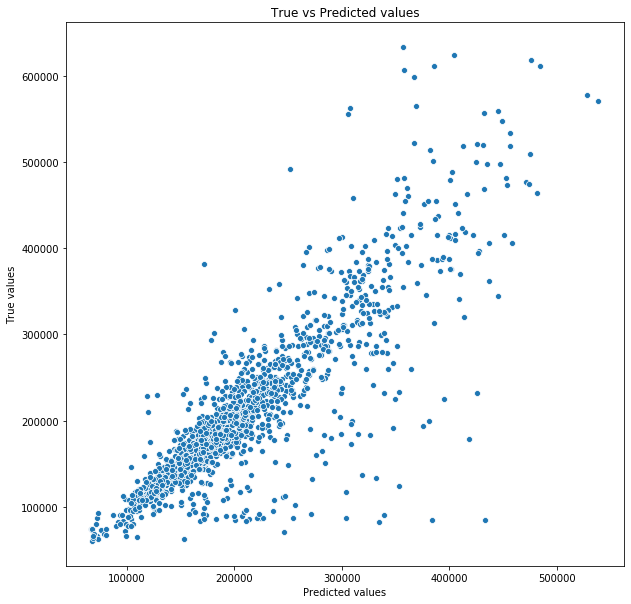

In [148]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,10)) 
sns.scatterplot(x = y_pred_valid, y = y_valid.values[: , 0])

plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('True vs Predicted values')
plt.show()

In [179]:
y_valid['Price'] = y_pred_valid
y_valid.sort_values(by = 'Price', ascending = False)
y_valid

C:\Users\snetkova\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Price
6252,190684.587791
4684,342662.868087
1731,216096.025694
4742,72133.446218
4521,126774.741589
...,...
967,167324.521108
6043,206093.391160
6879,178414.258750
6775,95613.900463


In [177]:
X_valid.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Area
Id,,,,,,,,,,,,,,,,,
3702,2.0,48.812195,34.679779,5.0,5.0,5.0,1963.0,0.034331,1,1,25.0,5487.0,3.0,0.0,4.0,1,1.0
12848,3.0,81.103039,49.310278,8.0,4.0,4.0,1960.0,0.298205,1,1,16.0,4048.0,3.0,1.0,3.0,1,1.0
2239,3.0,82.882978,3.977650,1.0,8.0,17.0,1977.0,0.243205,1,1,5.0,1564.0,0.0,0.0,0.0,1,4.0
15611,1.0,33.863324,29.993297,0.0,4.0,4.0,1977.0,0.034656,1,1,0.0,168.0,0.0,0.0,0.0,1,4.0
5634,1.0,43.095135,28.952733,1.0,10.0,17.0,1977.0,0.371149,1,1,34.0,7065.0,1.0,2.0,5.0,1,1.0


In [149]:
y_pred_test = model.predict(X_test)
y_pred_test

array([165996.95756312, 190011.3402207 , 303114.92880675, ...,
       326651.91290019, 203616.93424155, 180940.46350466])

In [150]:
y_test['Price'] = y_pred_test
y_test.head()

,Id,Price
0,725,165996.957563
1,15856,190011.340221
2,5480,303114.928807
3,15664,363331.923658
4,14275,137971.018893


In [151]:
feature_importances = pd.DataFrame(zip(X_train.columns, model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
1,Square,0.223519
2,LifeSquare,0.143590
11,Social_2,0.087896
0,Rooms,0.085501
10,Social_1,0.077723
3,KitchenSquare,0.062035
6,HouseYear,0.055128
7,Ecology_1,0.052387
12,Social_3,0.051481
5,HouseFloor,0.037216


In [153]:
# y_test.to_csv('C:/Temp/files/GeekBrains/ds_python_libs/final/new_params/final_task_backup_LSq.csv', index = False)